## Contents

* Introduction
* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages
* Stage 2 : Data preprocessing
    * 2.1 Load Data
    * 2.2 Explore Raw Data
    * 2.3 Conclusions
* Stage 3 : Exploratory Data Analysis (EDA).    
    * 3.1 Mengatasi Nilai-Nilai yang Hilang (Jika Ada)
        * 3.1.1 Memperbaiki nilai yang hilang pada kolom model_year
        * 3.1.2 Memperbaiki nilai yang hilang pada kolom cylinders
        * 3.1.3 Memperbaiki nilai yang hilang pada kolom odometer
        * 3.1.4 Memperbaiki nilai yang hilang pada kolom paint_color
        * 3.1.5 Memperbaiki nilai yang hilang pada kolom is_4wd
    * 3.2 Memperbaiki Tipe Data
    * 3.3 Memperbaiki Kualitas Data
    * 3.4 Memeriksa Data yang Sudah Bersih
    * 3.5 Mempelajari Parameter Inti
    * 3.6 Mempelajari dan Menangani Outlier
        * 3.6.1 Mempelajari dan Menangani Outlier pada kolom price
        * 3.6.2 Mempelajari dan Menangani Outlier pada kolom vehicle_age
        * 3.6.3 Mempelajari dan Menangani Outlier pada kolom odo_year
        * 3.6.5 Mempelajari dan Menangani Outlier pada kolom condition
        * 3.6.6 Mempelajari dan Menangani Outlier pada kolom cylinders
    * 3.7 Mempelajari Parameter Inti Tanpa Outlier
        * 3.7.1 Parameter Inti Tanpa Outlier pada kolom price
        * 3.7.2 Parameter Inti Tanpa Outlier pada kolom vehicle_age
        * 3.7.3 Parameter Inti Tanpa Outlier pada kolom odo_year
        * 3.7.4 Parameter Inti Tanpa Outlier pada kolom condition
        * 3.7.5 Parameter Inti Tanpa Outlier pada kolom cylinders
    * 3.8 Masa Berlaku Iklan
    * 3.9 Harga Rata-Rata Setiap Jenis Kendaraan
    * 3.10 Faktor Harga
* Stage 4 : Kesimpulan Umum

##  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, kita akan mencari tahu faktor-faktor yang memengaruhi harga sebuah kendaraan berdasarkan data Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Pihak perusahaan telah memberi kita beberapa data yang telah dikumpulkan selama beberapa tahun terakhir, yang mana data tersebut akan dilakukan uji hipotesis dibawah dan mencari tahu faktor-faktor yang memengaruhi harga sebuah kendaraan.



# Data Overview

   **Faktor apakah yang menjual sebuah mobil?**
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.


## Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Menentukan Faktor-Faktor yang memengaruhi harga sebuah kendaraan berdasarkan data yang telah dikumpulkan selama beberapa tahun terakhir
    
## Stages

Data situs web perusahaan selama beberapa tahun terakhir disimpan dalam file '/datasets/vehicles_us.csv'. Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari tiga tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)

# Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat Data

In [2]:
# Muat file data menjadi DataFrame
path = '/datasets/vehicles_us.csv'
data = pd.read_csv(path)

## Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
18862,2700,2009.0,ford fusion,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2018-07-20,29
26797,10888,2007.0,toyota tacoma,good,6.0,gas,NaN,automatic,pickup,silver,NaN,2018-10-30,67
2596,28469,2014.0,ford f-150,excellent,6.0,gas,83436.0,automatic,truck,red,1.0,2019-04-07,4
25617,13490,2016.0,chrysler 300,good,6.0,gas,77983.0,automatic,sedan,grey,NaN,2018-06-22,11
19425,5950,2014.0,honda civic,good,4.0,gas,122000.0,automatic,sedan,NaN,NaN,2018-07-17,45
1805,6250,2015.0,hyundai sonata,good,4.0,gas,95167.0,automatic,sedan,white,NaN,2018-09-29,23
13404,7500,2014.0,chevrolet malibu,excellent,4.0,gas,47000.0,automatic,sedan,yellow,NaN,2018-05-12,14
5828,12431,2012.0,ram 1500,good,8.0,gas,NaN,automatic,truck,grey,1.0,2018-09-17,26
5135,19985,2006.0,ram 3500,excellent,6.0,diesel,NaN,automatic,pickup,NaN,1.0,2018-09-11,101
11288,13900,2013.0,gmc acadia,excellent,6.0,gas,NaN,automatic,SUV,black,NaN,2018-05-08,30


* Berdasarkan data diatas, dapat diperoleh informasi terkait sampel data yaitu : 
    1. Dataframe memiliki 51525 baris dan 12 kolom
    2. Tedapat 5 kolom yang memiliki nilai yang hilang yaitu kolom model_year, cylinders, odometer, paint_color, dan is_4wd.
    3. Terdapat Tipe Data yang tidak sesuai, yaitu pada kolom price, model_year, cylinders, odometer, is_4wd, days_listed, dan date_posted.

In [5]:
# kolom kolom yang memiliki tipe data yang salah
data.loc[:,['price','model_year', 'cylinders', 'odometer', 'is_4wd', 'days_listed', 'date_posted']]

,price,model_year,cylinders,odometer,is_4wd,days_listed,date_posted
0,9400,2011.0,6.0,145000.0,1.0,19,2018-06-23
1,25500,NaN,6.0,88705.0,1.0,50,2018-10-19
2,5500,2013.0,4.0,110000.0,NaN,79,2019-02-07
3,1500,2003.0,8.0,NaN,NaN,9,2019-03-22
4,14900,2017.0,4.0,80903.0,NaN,28,2019-04-02
...,...,...,...,...,...,...,...
51520,9249,2013.0,6.0,88136.0,NaN,37,2018-10-03
51521,2700,2002.0,4.0,181500.0,NaN,22,2018-11-14
51522,3950,2009.0,4.0,128000.0,NaN,32,2018-11-15
51523,7455,2013.0,4.0,139573.0,NaN,71,2018-07-02


* Terdapat Tipe Data yang tidak sesuai, yaitu pada kolom price, model_year, cylinders, odometer, is_4wd, days_listed, dan date_posted.

In [6]:
# cek nilai yang hilang
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by= 'missing_values', ascending=False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


* Terdapat nilai yang hilang di beberapa kolom. Ada 5 kolom yang memiliki nilai yang hilang, yaitu kolom model_year, cylinders, odometer, paint_color, dan is4wd. Kolom yang memuat paling banyak nilai yang hilang adalah kolom is4wd yang memiliki 50 persen nilai yang hilang.

## Kesimpulan dan Langkah-Langkah Selanjutnya


Kesimpulan yang dapat diambil setelah melihat data mentah sebagai berikut :

   1. Dataframe tidak terlihat normal, karena terdapat nilai yang hilang dan tipe data yang tidak sesuai pada beberapa kolom.
   2. Tedapat 5 kolom yang memiliki nilai yang hilang yaitu kolom model_year, cylinders, odometer, paint_color, dan is4wd. 
   3. Terdapat Tipe Data yang tidak sesuai, yaitu pada kolom price, model_year, cylinders, odometer, is4_wd, days_listed, dan date_posted.
    
Langkah-langkah yang harus diambil untuk menangani data awal yang memiliki masalah yaitu :
    
   1. Menangani nilai yang hilang pada kelima kolom tersebut dengan beberapa cara, dapat menggunakan mean atau median untuk mengisi nilai yang hilang.
   2. Memperbaiki tipe data yang tidak sesuai :
   
    a. Kolom date_posted ke datetime;
    
    b. Kolom days_listed, id, model_year, cylinders ke int, karena kemungkinan besar berisi variabel bilangan bulat;
    
    c. Kolom is_4wd ke boolean, karena ini adalah bidang Boolean
    
    d. Kolom price dan odometer menajdi float, karena mereka mungkin memiliki pecahan
    
    e. Kolom model, condition, fuel, transmission type, paint_color akan tetap menjadi kolom string.
       

# Exploratory Data Analysis (EDA)

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Periksa nilai yang hilang untuk setiap kolom secara detail, dan mengisi nilai yang hilang tersebut.

In [7]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Memperbaiki nilai yang hilang pada kolom `model_year`

In [8]:
# Periksa nilai dalam kolom price
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [9]:
# Mari kita lihat tabel di kolom model_year yang mengandung data yang hilang
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


* Terdapat nilai yang hilang pada kolom model_year, untuk itu kita harus mengisi nilai yang hilang tersebut. Pertama, buat kategori harga untuk setiap model dan membuat kolom baru untuk kategori harga tersebut.

In [10]:
# Buat pengkategorian berdasarkan bahan harga/price
def price_category(price):
    if price <= 10000:
        return '0 - 10000'
    elif price > 10000 and price <= 20000:
        return '10000 - 20000'
    elif price > 20000 and price <= 30000:
        return '20000 - 30000'
    else:
        return '> 30000'

# cek fungsi
price_category(25000)

'20000 - 30000'

In [11]:
# buat kolom baru berdasarkan fungsi diatas
data['price_group'] = data['price'].apply(price_category)

In [12]:
# Periksa bagaimana nilai di dalam kolom baru
data.loc[:, ['price', 'price_group']].head(10)

,price,price_group
0,9400,0 - 10000
1,25500,20000 - 30000
2,5500,0 - 10000
3,1500,0 - 10000
4,14900,10000 - 20000
5,14990,10000 - 20000
6,12990,10000 - 20000
7,15990,10000 - 20000
8,11500,10000 - 20000
9,9200,0 - 10000


In [13]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
clean_data = data[~(data['price'].isnull())]

In [14]:
# Perhatikan nilai rata-rata untuk model year berdasarkan faktor yang telah kamu identifikasi
model_year_mean = data.pivot_table(index='price_group', values='model_year', aggfunc='mean')
model_year_mean

,model_year
price_group,
0 - 10000,2007.329832
10000 - 20000,2011.533868
20000 - 30000,2014.165702
> 30000,2015.473576


In [15]:
# Perhatikan nilai median untuk model year berdasarkan faktor yang telah kamu identifikasi
model_year_median = data.pivot_table(index='price_group', values='model_year', aggfunc='median')
model_year_median

,model_year
price_group,
0 - 10000,2008.0
10000 - 20000,2012.0
20000 - 30000,2015.0
> 30000,2017.0


* Kita akan menggunakan median untuk mengisi nilai yang hilang pada kolom model_year karena median lebih baik untuk distribusi tahun model yang tidak merata dan menggunakan median akan membantu mengurangi pengaruh nilai ekstrem atau outliers dan memberikan representasi yang lebih akurat tentang model tahun pada jenis kendaraan tertentu.

In [16]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fillna_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [17]:
# Memeriksa bagaimana nilai di dalam kolom baru
data_median = fillna_median(data, "price_group", "model_year")
data_median.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [18]:
# Terapkan fungsi tersebut ke setiap baris
data_median2 = fillna_median(data, "model", "model_year")
data_median2.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [19]:
# Periksa apakah kita mendapatkan kesalahan
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
price_group         0
dtype: int64

* Nilai yang hilang pada kolom model_year telah berhasil diisi oleh nilai median, sehingga tidak ada nilai yang hilang lagi pada kolom tersebut.

### Memperbaiki nilai yang hilang pada kolom `cylinders`

In [20]:
# Mari kita lihat tabel di kolom cylinders yang mengandung data yang hilang
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [21]:
# Distribusi median dari `cylinders` berdasarkan parameter yang kamu identifikasi
cylinders_median = data.pivot_table(index='price_group', values='cylinders', aggfunc='median')
cylinders_median

,cylinders
price_group,
0 - 10000,6.0
10000 - 20000,6.0
20000 - 30000,8.0
> 30000,8.0


In [22]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang kamu identifikasi
cylinders_mean = data.pivot_table(index='price_group', values='cylinders', aggfunc='mean')
cylinders_mean

,cylinders
price_group,
0 - 10000,5.699032
10000 - 20000,6.376232
20000 - 30000,6.969834
> 30000,7.333048


* Berdasarkan perhitungan diatas, kita akan menggunakan median untuk mengisi nilai yang hilang pada kolom cylinders karena  nilai median dan mean terdapat perbedaan yang signifikan, itu bisa jadi menandakan adanya indikasi outliers dalam data, sehingga menggunakan median lebih baik untuk distribusi cylinders yang tidak merata dan karena median lebih tahan terhadap outliers.

In [23]:
# Periksa apakah fungsi yang telah dibuat pada sel code diatas
data_median_cylinders = fillna_median(data, "price_group", "cylinders")
data_median_cylinders.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [24]:
# Terapkan fungsi ke model
data_median_days_cylinders2 = fillna_median(data, "model", "cylinders")
data_median_days_cylinders2.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [25]:
# cek kembali nilai yang hilang
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
price_group         0
dtype: int64

* Nilai yang hilang pada kolom cylinders telah berhasil diisi oleh nilai median, sehingga tidak ada nilai yang hilang lagi pada kolom tersebut.

### Memperbaiki nilai yang hilang pada kolom `odometer`

In [26]:
# Mari kita lihat tabel di kolom odometer yang mengandung data yang hilang
data['odometer'].head(10)

0    145000.0
1     88705.0
2    110000.0
3         NaN
4     80903.0
5     57954.0
6     79212.0
7    109473.0
8    104174.0
9    147191.0
Name: odometer, dtype: float64

In [27]:
# Distribusi median dari `odometer` berdasarkan parameter yang kamu identifikasi
cylinders_median = data.pivot_table(index='price_group', values='odometer', aggfunc='median')
cylinders_median

,odometer
price_group,
0 - 10000,137264.0
10000 - 20000,98000.0
20000 - 30000,65000.0
> 30000,35500.0


In [28]:
# Distribusi rata-rata dari `odometer` berdasarkan parameter yang kamu identifikasi
odometer_mean = data.pivot_table(index='price_group', values='odometer', aggfunc='mean')
odometer_mean

,odometer
price_group,
0 - 10000,138511.083720
10000 - 20000,101856.603150
20000 - 30000,70916.888397
> 30000,48325.385766


* Berdasarkan perhitungan diatas, kita akan menggunakan median untuk mengisi nilai yang hilang pada kolom odometer karena nilai median dan mean terdapat perbedaan yang signifikan, itu bisa jadi menandakan adanya indikasi outliers dalam data, sehingga menggunakan median lebih baik untuk distribusi odometer yang tidak merata dan karena median lebih tahan terhadap outliers.

In [29]:
# Periksa apakah fungsi yang telah dibuat pada sel code diatas
data_median_odometer = fillna_median(data, "price_group", "odometer")
data_median_odometer.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,137264.0,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [30]:
# Terapkan fungsi ke model
data_median_odometer2 = fillna_median(data, "model", "odometer")
data_median_odometer2.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,137264.0,automatic,pickup,NaN,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,10000 - 20000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,10000 - 20000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,10000 - 20000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,10000 - 20000
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,0 - 10000


In [31]:
# cek kembali nilai yang hilang
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
price_group         0
dtype: int64

* Nilai yang hilang pada kolom odometer telah berhasil diisi oleh nilai median, sehingga tidak ada nilai yang hilang lagi pada kolom tersebut.

### Memperbaiki nilai yang hilang pada kolom `paint_color`

In [32]:
# Memeriksa distribusi unique missing value pada kolom is_4wd
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [33]:
# Missing value di kolom paint color diisi unknown karena saya tidak memberikan 
# asumsi warna mobil dari data missing
data['paint_color'] = data['paint_color'].fillna('unknown')

* Kita mengisi nilai yang hilang pada kolom paint_color dengan cara mengisi secara langsung nilai tersebut dengan method .fillna()

In [34]:
# cek apakah berhasil mengisi nilai yang hilang
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,137264.0,automatic,pickup,unknown,NaN,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,10000 - 20000


In [35]:
# cek kembali nilai yang hilang
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
price_group         0
dtype: int64

* Nilai yang hilang pada kolom paint_color telah berhasil diisi oleh nilai median, sehingga tidak ada nilai yang hilang lagi pada kolom tersebut.

### Memperbaiki nilai yang hilang pada kolom `is_4wd`

In [36]:
# Memeriksa distribusi unique missing value pada kolom is_4wd
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [37]:
# karena di kolom is 4wd punya 2 value (true dan false), maka untuk value missing diberi angka 0.
data['is_4wd'] = data['is_4wd'].fillna(0)

* Kita mengisi nilai yang hilang pada kolom is_4wd dengan cara mengisi secara langsung nilai tersebut dengan method .fillna()

In [38]:
# cek apakah berhasil mengisi nilai yang hilang
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,0 - 10000
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,20000 - 30000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,0 - 10000
3,1500,2003.0,ford f-150,fair,8.0,gas,137264.0,automatic,pickup,unknown,0.0,2019-03-22,9,0 - 10000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,10000 - 20000


* Nilai yang hilang pada kolom is_4wd telah berhasil diisi oleh nilai median, sehingga tidak ada nilai yang hilang lagi pada kolom tersebut.

## Memperbaiki Tipe Data

In [39]:
# cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  price_group   51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


* Mari kita ubah tipe data berikut dalam kolom:

    * Kolom date_posted ke datetime;
    * Kolom days_listed, id, model_year, cylinders ke int, karena kemungkinan besar berisi variabel bilangan bulat;
    * Kolom is_4wd ke boolean, karena ini adalah bidang Boolean
    * Kolom price dan odometer menajdi float, karena mereka mungkin memiliki pecahan
    * Kolom model, condition, fuel, transmission type, paint_color akan tetap menjadi kolom string.

In [40]:
# Ganti tipe data kolom price ke float
data['price'] = data['price'].astype('float64')

In [41]:
# Ganti tipe data kolom odometer ke float
data['odometer'] = data['odometer'].astype('float64')

In [42]:
# Ganti tipe data model_year ke int
data['model_year'] = data['model_year'].astype('int16')

In [43]:
# Ganti tipe data cylinders ke int
data['cylinders'] = data['cylinders'].astype('int16')

In [44]:
# Ganti tipe data days_listed ke int
data['days_listed'] = data['days_listed'].astype('int16')

In [45]:
# Ganti tipe data  is_4wd ke bool
data['is_4wd'] = data['is_4wd'].astype('bool')

In [46]:
# Ganti tipe data date_posted ke date time
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [47]:
# cek tipe data lagi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int16         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int16         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int16         
 13  price_group   51525 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int16(3), object(7)
memory usage: 4.3+ MB


* Semua Tipe data yang harus diperbaiki telah diperbaiki sesuai tipe data yang seharusnya

## Memperbaiki Kualitas Data

In [48]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
data['day_posted'] = data['date_posted'].dt.day
data['mont_posted'] = data['date_posted'].dt.month
data['year_posted'] = data['date_posted'].dt.year
data['week_posted'] = data['date_posted'].dt.weekday

In [49]:
# Tambahkan usia kendaraan saat iklan ditayangkan
data['vehicle_age'] = (data['year_posted'] - data['model_year']).astype(int) + 1

In [50]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
data['odo_year'] = data['odometer'] / data['vehicle_age']

In [51]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
def condition_change(value):
    if value == 'salvage':
        result = 0
    elif value == 'fair':
        result = 1
    elif value == 'good':
        result = 2
    elif value == 'excellent':
        result = 3
    elif value == 'like new':
        result = 4
    elif value == 'new':
        result = 5
    return result

In [52]:
data['condition'] = data['condition'].apply(condition_change) 

## Memeriksa Data yang Sudah Bersih

Data sudah siap untuk dianalisis. Cek sekali lagi untuk memastikan dan akan sangat berguna untuk melihat apa sebenarnya yang akan kamu gunakan untuk analisis.

In [53]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int16         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int16         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int16         
 13  price_group   51525 non-null  object        
 14  day_posted    51525 non-null  int64         
 15  mont_posted   51525 non-null  int64 

In [54]:
# tampilkan sampel data 
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group,day_posted,mont_posted,year_posted,week_posted,vehicle_age,odo_year
38513,24497.0,2018,ford explorer,4,8,gas,38000.0,automatic,SUV,white,False,2019-02-10,69,20000 - 30000,10,2,2019,6,2,19000.000000
20082,18995.0,2013,chevrolet tahoe,2,8,gas,113637.0,automatic,SUV,silver,True,2018-06-10,4,10000 - 20000,10,6,2018,6,6,18939.500000
28012,44900.0,2017,jeep wrangler unlimited,3,6,gas,33500.0,automatic,truck,black,True,2019-03-22,2,> 30000,22,3,2019,4,3,11166.666667
39069,4395.0,2009,nissan versa,3,4,gas,131000.0,automatic,hatchback,silver,False,2018-12-20,55,0 - 10000,20,12,2018,3,10,13100.000000
39570,7950.0,2008,ram 1500,3,8,gas,181303.0,automatic,truck,red,False,2018-06-09,14,0 - 10000,9,6,2018,5,11,16482.090909
12994,5975.0,2006,ford focus,3,4,gas,46700.0,automatic,hatchback,blue,False,2018-08-06,35,0 - 10000,6,8,2018,0,13,3592.307692
22218,8999.0,2014,ford focus,2,4,gas,42782.0,automatic,sedan,grey,False,2019-01-08,60,0 - 10000,8,1,2019,1,6,7130.333333
9463,1.0,2015,ford edge,3,6,gas,24897.0,automatic,SUV,black,True,2018-06-21,83,0 - 10000,21,6,2018,3,4,6224.250000
20540,3600.0,2005,cadillac escalade,2,6,gas,2.0,automatic,SUV,black,True,2018-06-21,8,0 - 10000,21,6,2018,3,14,0.142857
839,11950.0,2008,chevrolet silverado 1500,3,8,gas,113162.0,automatic,truck,unknown,True,2019-03-29,28,10000 - 20000,29,3,2019,4,12,9430.166667


* Tipe data pada kolom condition telah diperbaiki menjadi nilai string dengan skala numerik sesuai permintaan.

## Mempelajari Parameter Inti 
Memilih pendekatan yang tepat untuk mempelajari kolom di bawah ini, memperhatikan bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram.

- Kolom yang perlu diamati adalah

    - price
    - cylinders
    - odo_year
    - vehicle_age
    - condition

In [55]:
# Buat function untuk membuat histogram untuk mengecek outlier
def histogram(dataframe, column, binwidth=None):
    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram dari kolom {column}')
    sns.histplot(dataframe[column], binwidth=binwidth)
    plt.show

In [56]:
# Buat function untuk membuat boxplot untuk mengecek outlier
def boxplot(dataframe, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataframe[column])
    plt.title(f'Boxplot dari kolom {column}')
    plt.xlabel(column)
    plt.show()

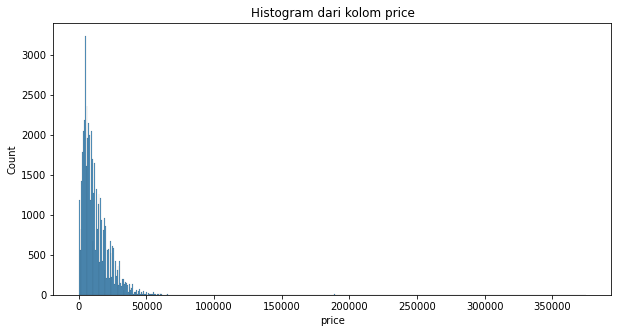

In [57]:
# Histogram untuk kolom price
histogram(dataframe=data, column='price')

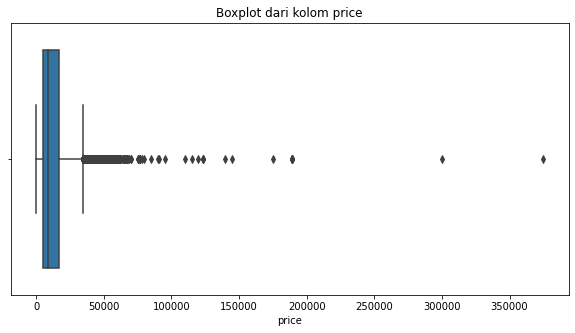

In [58]:
# Boxplot untuk kolom price
boxplot(dataframe=data, column='price')

In [59]:
# cari rata-rata dan median dari kolom harga
print('mean', data['price'].mean())
print('median', data['price'].median())

mean 12132.464919941776
median 9000.0


* findings :
    * Data penjualan Harga Kendaraan tersebar dengan Range 0 - 50 ribu
    * Terdapat data outlier hingga lebih dari 3500
    * Rata-rata Harga Kendaraan di harga 12 ribu
    * 50% Kendaraan yang dijual dibawah 9 ribu
* insight :
    * Jarang orang menjual kendaraan dengan harga yang mahal
    * Kendaraan yang dijual di website kebanyakan di harga 12 ribu
* recommendation :
    * Jika ingin menjual Kendaraan dengan cepat, bisa dijual dengan harga dibawah 12 ribu

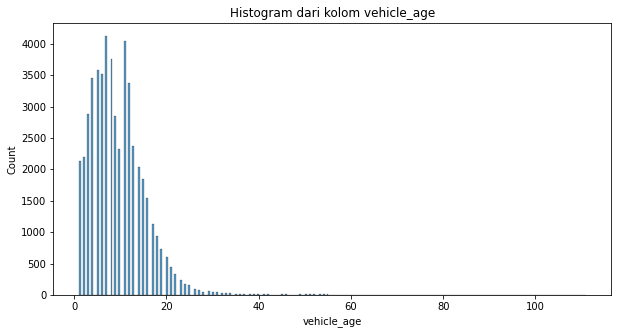

In [60]:
# Histogram untuk kolom vehicle_age
histogram(dataframe=data, column='vehicle_age')

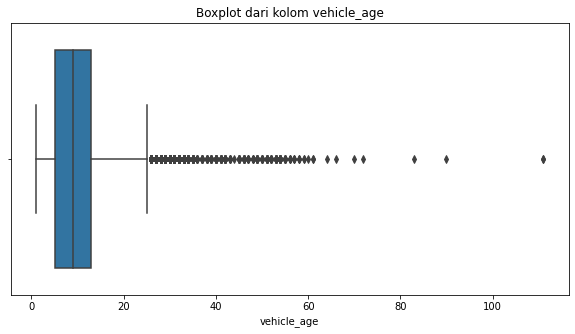

In [61]:
# Boxplot untuk kolom vehicle_age
boxplot(dataframe=data, column='vehicle_age')

In [62]:
# cari rata-rata dan median dari kolom vehicle_age
print('mean', data['vehicle_age'].mean())
print('median', data['vehicle_age'].median())

mean 9.517011159631247
median 9.0


* findings :
    * Data Usia Kendaraan ketika iklan ditayangkan tersebar dari range 0-50 tahun
    * Tidak outlier dalam data
    * Rata-rata usia kendaraan ketika iklan ditayangkan adalah sekitar 8 tahun
    * 50% usia kendaraan ketika iklan ditayangkan dijual dibawah 8 tahun
* insight :
    * Jarang orang menjual kendaraan dengan usia kendaraan yang lebih dari 20 tahun
    * Usia Kendaraan yang dijual diwebsite kebanyakan dijual di usia sekitar 8 tahun
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan usia dibawah 8 tahun.

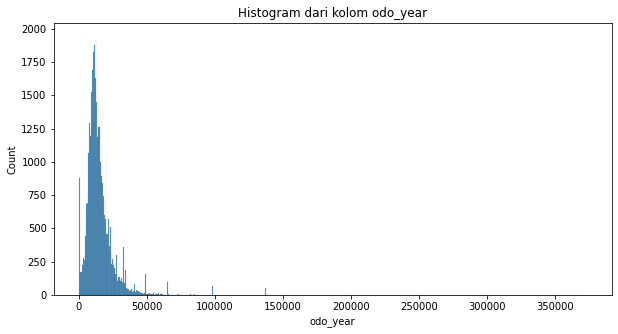

In [63]:
# Histogram untuk kolom odo_year
histogram(dataframe=data, column='odo_year')

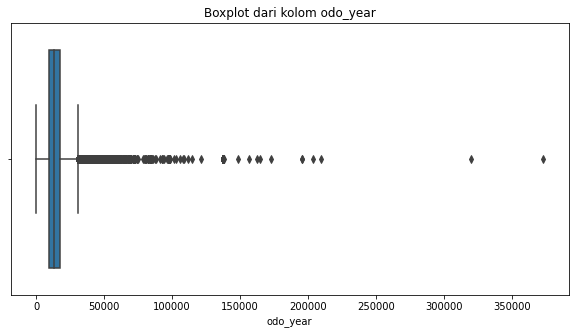

In [64]:
# Boxplot untuk kolom odo_year
boxplot(dataframe=data, column='odo_year')

In [65]:
# cari rata-rata dan median dari kolom odo_year
print('mean', data['odo_year'].mean())
print('median', data['odo_year'].median())

mean 15067.620466922157
median 13000.0


* findings :
    * Data jarak tempuh rata-rata kendaraan per tahun tersebar dari range 0-140 ribu kilometer
    * Terdapat Outlier dalam data hingga 1750 kendaraan
    * Rata-rata Jarak Tempuh kendaraan adalah sekitar 15 ribu kilometer
    * 50% jarak tempuh rata-rata kendaraan per tahun dijual dibawah 13 ribu kilometer
* insight :
    * Jarang orang menjual kendaraan dengan jarak tempuh yang lebih dari 50 ribu kilometer
    * Jarak tempuh rata-rata Kendaraan per tahun yang dijual diwebsite sekitar 15 ribu kilometer
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan jarak tempuh dibawah 13 ribu kilometer.

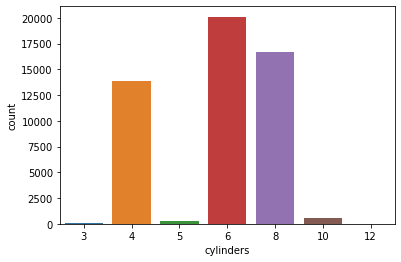

In [66]:
# Barchart untuk kolom cylinders
sns.countplot(data=data, x='cylinders')
plt.show()

* findings :
    * Kendaraan yang dijual di website adalah kendaraan yang bersilinder 3,4,5,6,8, dan 10
    * Kendaraan yang paling banyak dijual di website adalah kendaraan yang bersilinder 4,6, dan 8
    * Sangat jarang kendaraan bekas yang dijual dengan silinder 3,5 dan 10
* insight :
    * Kendaraan dengan silindir 3,5, dan 10 adalah kendaraan langka. Bisa jadi kendaraan dengan silinder tersebut sulit dijual atau termasuk kendaraan langka
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan silinder 6

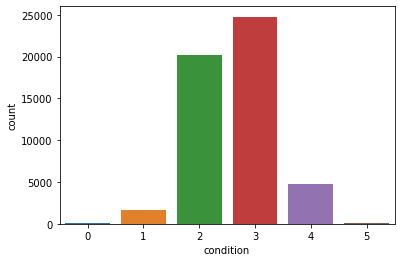

In [67]:
#  Barchart untuk kolom condition
sns.countplot(data=data, x='condition')
plt.show()

* findings :
    * Kendaraan yang paling banyak dijual di website adalah kendaraan yang kondisinya excellent
    * Sangat jarang kendaraan yang dijual di website dengan kondisi salvage atau rongsok
    * Kendaraan dengan kondisi new atau baru juga jarang dijual di website
* insight :
    * Kendaraan dengan kondisi salvage bisa jadi kendaraan tersebut sudah rusak parah atau sudah rongsokan
    * Kendaraan dengan kondisi new jarang di jual diwebsite bisa jadi si penjual menjadi reseller atau tidak suka dengan kendaraan barunya
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan kondisi yang excellent

## Mempelajari dan Menangani Outlier

Berdasarkan hasil di atas, kita menentukan kolom mana yang mungkin berisi outlier dan membuat sebuah DataFrame tanpa outlier tersebut. 

In [68]:
# Cell code 1
def upper_lower_whisker(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = 1.5*IQR + Q3
    
    return lower_whisker, upper_whisker

In [69]:
# Cell Code 2
def outlier_cleansing(dataframe, column):
    
    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')
    
    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe

    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


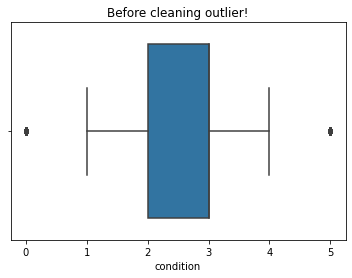

lower_check values : 0.5
upper_check values : 4.5


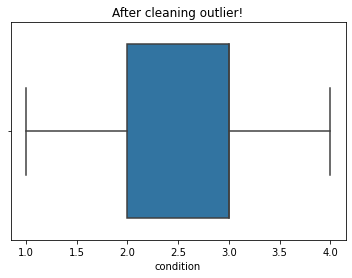


====== [FINISHED] outlier in [condition] column has been clear! ====== 


====== [START] cleaning outlier in price column ====== 

lower values : -12700.0
upper values : 34500.0


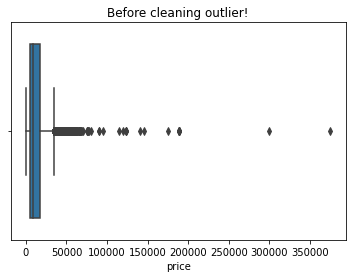

lower_check values : -11362.5
upper_check values : 32257.5


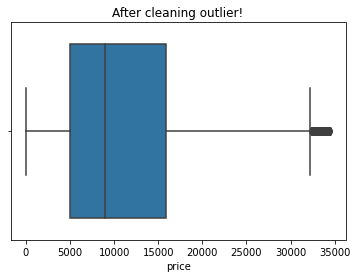


------ [RE-START] cleaning outlier in price column ------ 

lower values : -11362.5
upper values : 32257.5


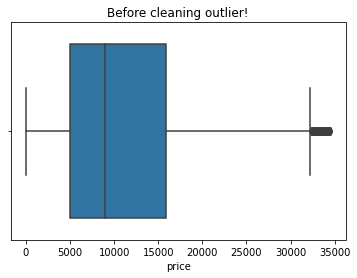

lower_check values : -10762.5
upper_check values : 31257.5


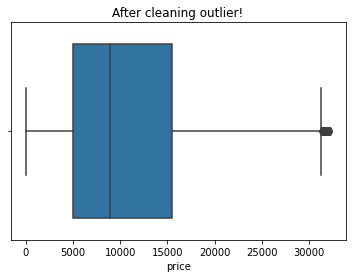


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10762.5
upper values : 31257.5


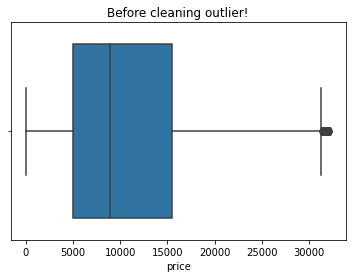

lower_check values : -10012.5
upper_check values : 30007.5


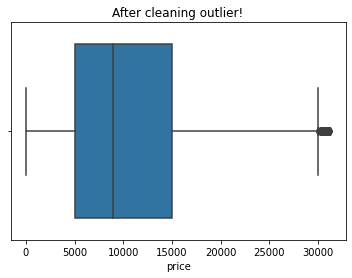


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10012.5
upper values : 30007.5


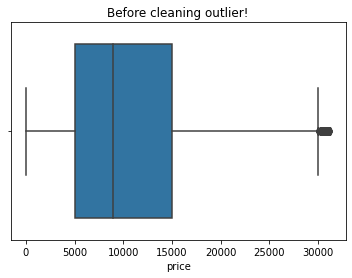

lower_check values : -10011.0
upper_check values : 30005.0


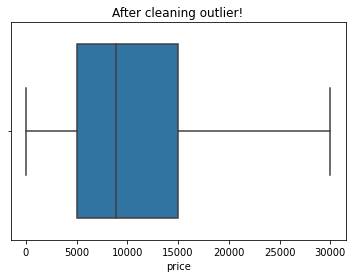


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10011.0
upper values : 30005.0


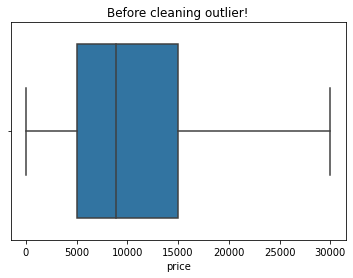

lower_check values : -10011.0
upper_check values : 30005.0


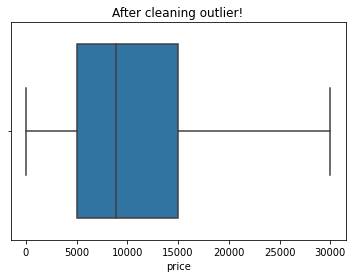


====== [FINISHED] outlier in [price] column has been clear! ====== 


====== [START] cleaning outlier in vehicle_age column ====== 

lower values : -4.5
upper values : 23.5


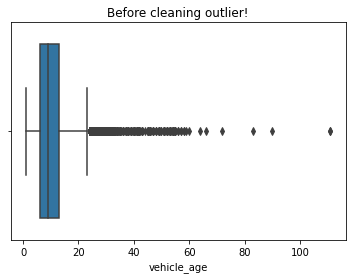

lower_check values : -4.5
upper_check values : 23.5


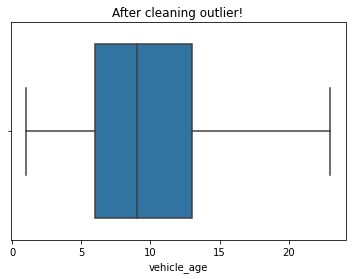


====== [FINISHED] outlier in [vehicle_age] column has been clear! ====== 


====== [START] cleaning outlier in odo_year column ====== 

lower values : -2441.027529761901
upper values : 30051.105406746028


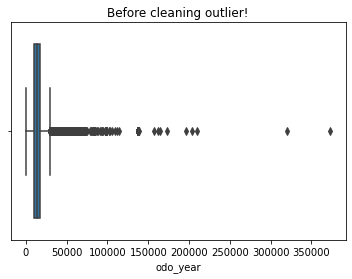

lower_check values : -1596.67948717949
upper_check values : 27905.576923076926


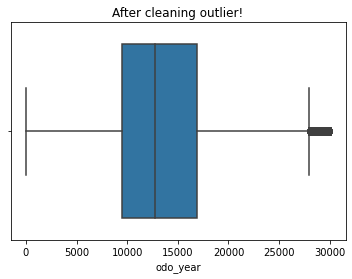


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1596.67948717949
upper values : 27905.576923076926


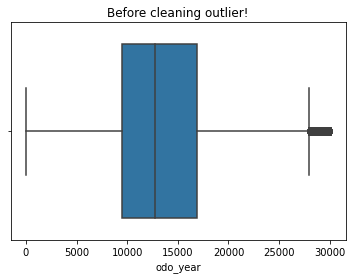

lower_check values : -1411.7757352941208
upper_check values : 27450.99877450981


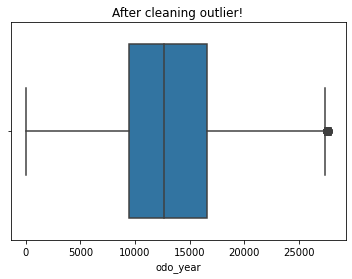


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1411.7757352941208
upper values : 27450.99877450981


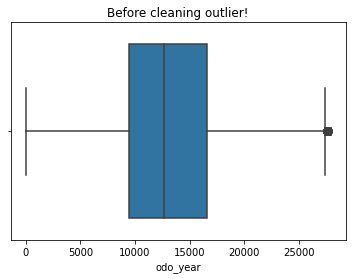

lower_check values : -1315.611538461535
upper_check values : 27218.32692307692


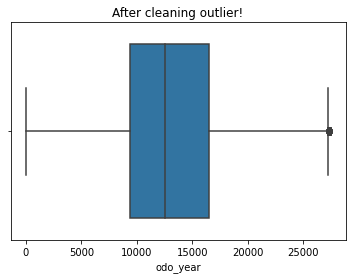


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1315.611538461535
upper values : 27218.32692307692


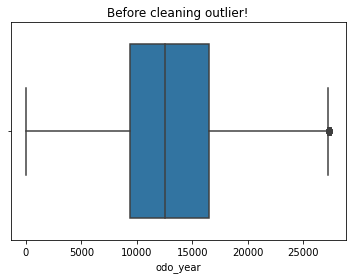

lower_check values : -1311.8749999999982
upper_check values : 27186.45833333333


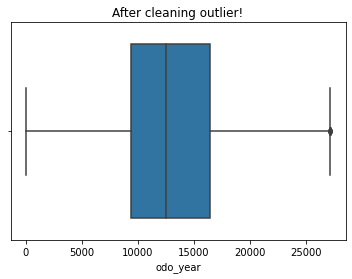


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1311.8749999999982
upper values : 27186.45833333333


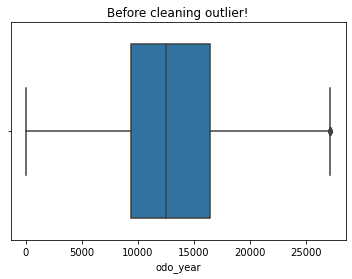

lower_check values : -1297.734375
upper_check values : 27162.890625


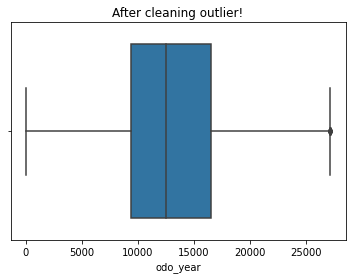


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1297.734375
upper values : 27162.890625


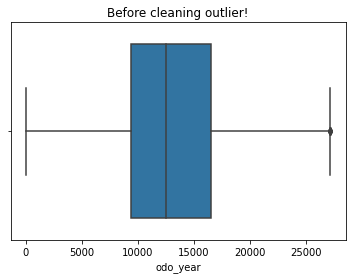

lower_check values : -1292.211538461539
upper_check values : 27153.6858974359


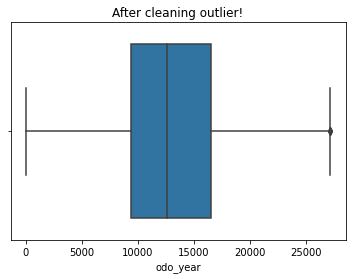


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1292.211538461539
upper values : 27153.6858974359


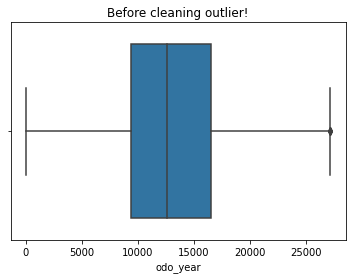

lower_check values : -1291.125
upper_check values : 27151.875


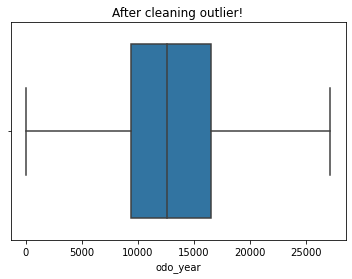


------ [RE-START] cleaning outlier in odo_year column ------ 

lower values : -1291.125
upper values : 27151.875


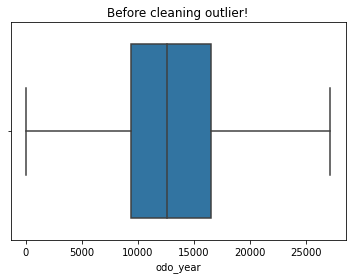

lower_check values : -1291.125
upper_check values : 27151.875


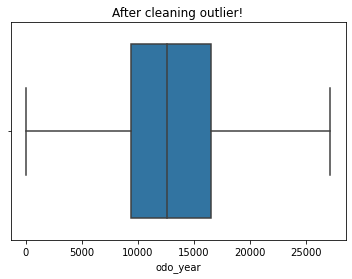


====== [FINISHED] outlier in [odo_year] column has been clear! ====== 


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


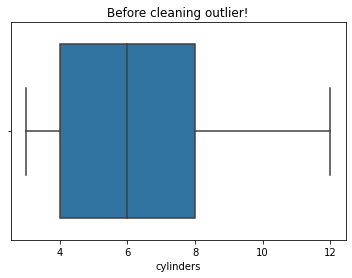

lower_check values : -2.0
upper_check values : 14.0


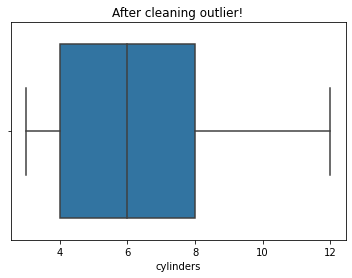


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 



In [70]:
# Cell code 3

data_final = data.copy()
list_of_selected_column = ['condition', 'price', 'vehicle_age', 'odo_year', 'cylinders']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    data_final = outlier_cleansing(dataframe=data_final, column=column)

### Mempelajari dan Menangani Outlier pada kolom price

* findings :
    Berdasarkan hasil diatas, dapat disimpulkan :
    1. Batas bawah outlier pada kolom price adalah -12700.0, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
    2. Batas atas outlier pada kolom price adalah 34500.0
    3. Pada awalnya kolom price Terdapat Outliers yang besar hingga lebih dari 350000 ribu
    4. Perlu dilakukan 5 kali proses pembersihan outlier
    5. Cleaning Outlier pertama, batas bawahnya berubah menjadi -11362.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 32257.5
    
    6. Cleaning Outlier kedua, batas bawahnya berubah menjadi -10762.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 31257.5
    
    7. Cleaning Outlierketiga, batas bawahnya berubah menjadi -10012.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30007.5
    
    8. Cleaning Outlier keempat, batas bawahnya berubah menjadi -10011.0 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30005.0
    
    9. Cleaning Outlier kelima, batas bawahnya berubah menjadi -10011.0 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30005.0
    
    8. Outlier berhasil dibersihkan setelah dilakukan 5 kali cleaning outlier, sehingga tidak terdapat outlier lagi.

### Mempelajari dan Menangani Outlier pada kolom vehicle_age

* findings :
    Berdasarkan hasil diatas, dapat disimpulkan :
    1. Batas bawah outlier pada kolom vehicle_age adalah -4.5, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
    2. Batas atas outlier pada kolom vehicle_age adalah 23.5 
    3. Pada awalnya kolom vehicle_age Terdapat Outliers yang besar hingga lebih dari 100 tahun
    4. Outlier berhasil dibersihkan hanya dengan 1 kali cleaning outlier, sehingga tidak terdapat outlier lagi

### Mempelajari dan Menangani Outlier pada kolom odo_year

* findings :
    Berdasarkan hasil diatas, dapat disimpulkan :
    1. Batas bawah outlier pada kolom odo_year adalah -1596.67, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
    2. Batas atas outlier pada kolom odo_year adalah 27905.57
    3. Pada awalnya kolom odo_year Terdapat Outliers yang besar hingga lebih dari 350000 ribu
    4. Perlu dilakukan 8 kali proses pembersihan outlier
    5. Cleaning Outlier pertama, batas bawahnya berubah menjadi -1411.77 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27450.99
    
    6. Cleaning Outlier kedua, batas bawahnya berubah menjadi -1315.61 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27218.32
    
    7. Cleaning Outlier ketiga, batas bawahnya berubah menjadi -1311.87 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27186.45
    
    8. Cleaning Outlier keempat, batas bawahnya berubah menjadi -1297.7 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27162.89
    
    9. Cleaning Outlier kelima, batas bawahnya berubah menjadi -1292.21 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27153.68
    
    10. Cleaning Outlier keenam, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875
    
    11. Cleaning Outlier ketujuh, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875
    
    12. Cleaning Outlier kedelapan, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875
    
    13. Outlier berhasil dibersihkan setelah dilakukan 8 kali cleaning outlier, sehingga tidak terdapat outlier lagi.

### Mempelajari dan Menangani Outlier pada kolom condition

* findings :
    Berdasarkan hasil diatas, dapat disimpulkan :
    1. Batas bawah outlier pada kolom vehicle_age adalah 0.5, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
    2. Batas atas outlier pada kolom vehicle_age adalah 4.5 
    3. Pada awalnya kolom vehicle_age Terdapat Outliers yang bernilai 0 dan 5
    4. Outlier berhasil dibersihkan hanya dengan 1 kali cleaning outlier, sehingga tidak terdapat outlier lagi

### Mempelajari dan Menangani Outlier pada kolom cylinders

* findings :
    Berdasarkan hasil diatas, dapat disimpulkan :
    1. Batas bawah outlier pada kolom cylinders adalah -2.0, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
    2. Batas atas outlier pada kolom cylinders adalah 14.0
    3. Pada awalnya kolom cylinders memang tidak terdapat Outliers
    4. Sehingga tidak perlu adanya cleaning outlier

## Mempelajari Parameter Inti Tanpa Outlier

Menggunakan data yang sudah difilter untuk membuat grafik baru dan membandingkan dengan data sebelumnya (yang berisi outlier). Kemudian ambil kesimpulan

### Parameter Inti Tanpa Outlier pada kolom price

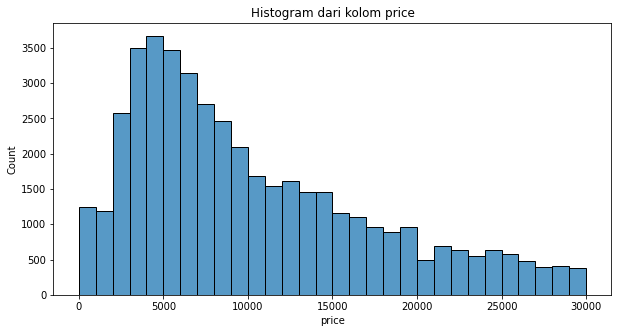

In [71]:
histogram(dataframe=data_final, column='price', binwidth=1000)

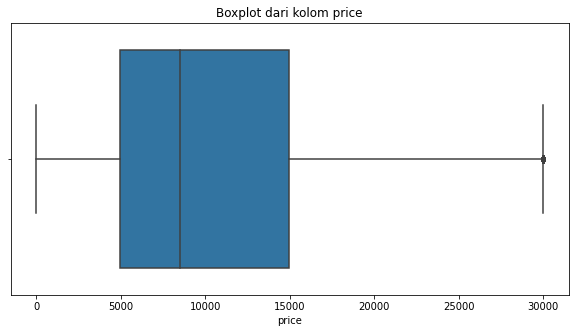

In [72]:
boxplot(dataframe=data_final, column='price')

In [73]:
# cari rata-rata dan median dari kolom price
print('mean', data_final['price'].mean())
print('median', data_final['price'].median())

mean 10478.046435697443
median 8500.0


* findings :
    * Setelah dibersihkan dari outlier, Data penjualan Harga Kendaraan tersebar dengan Range 0 - 30000 ribu dolar
    * Setelah dibersihkan dari outlier, Rata-rata Harga Kendaraan di harga 10478 dolar
    * setelah dibersihkan dari outlier, 50% Kendaraan yang dijual dibawah 8500 dolar
* insight :
    * Customer cenderung memilih untuk membeli kendaraan yang harganya dibawah 8500 dolar
    * Kendaraan yang dijual di website kebanyakan di harga 10500 dolar
* recommendation :
    * Jika ingin menjual Kendaraan dengan cepat, bisa dijual dengan harga dibawah 8500 dolar

### Parameter Inti Tanpa Outlier pada kolom vehicle_age

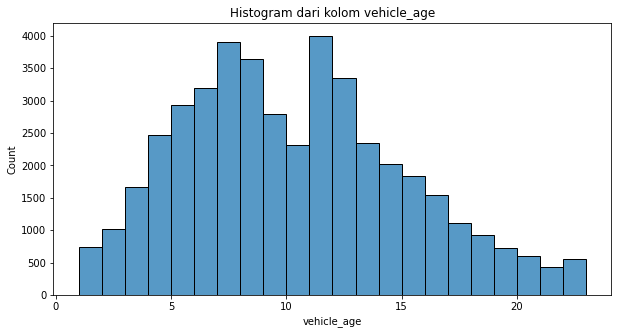

In [74]:
histogram(dataframe=data_final, column='vehicle_age', binwidth=1)

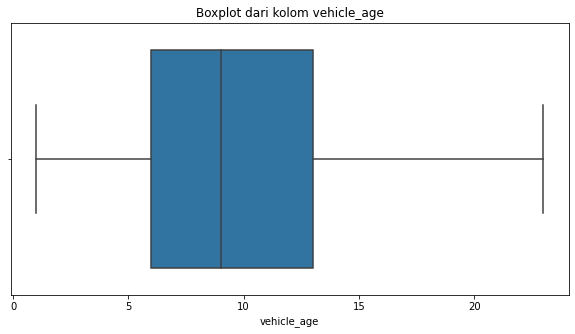

In [75]:
boxplot(dataframe=data_final, column='vehicle_age')

In [76]:
# cari rata-rata dan median dari kolom vehicle_age
print('mean', data_final['vehicle_age'].mean())
print('median', data_final['vehicle_age'].median())

mean 9.844980047161256
median 9.0


* findings :
    * Setelah data dibersihkan dari outlier, Data Usia Kendaraan ketika iklan ditayangkan tersebar dari range 0-22 tahun
    * Setelah data dibersihkan dari outlier, Rata-rata usia kendaraan ketika iklan ditayangkan adalah sekitar 9.8 tahun
    * Setelah data dibersihkan dari outlier, 50% usia kendaraan ketika iklan ditayangkan dijual dibawah 9 tahun
* insight :
    * Jarang orang menjual kendaraan dengan usia kendaraan yang lebih dari 20 tahun
    * Usia Kendaraan yang dijual diwebsite kebanyakan dijual di usia sekitar 9 tahun
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan usia dibawah 9 tahun.

### Parameter Inti Tanpa Outlier pada kolom odo_year

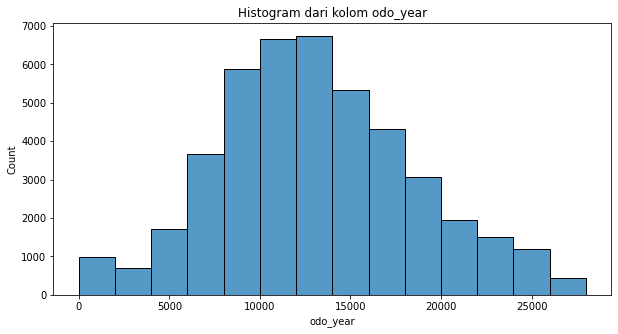

In [77]:
histogram(dataframe=data_final, column='odo_year', binwidth=2000)

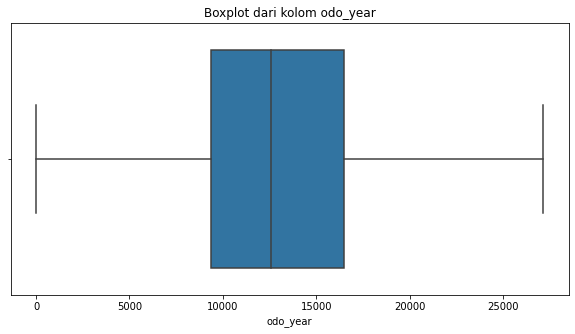

In [78]:
boxplot(dataframe=data_final, column='odo_year')

In [79]:
# cari rata-rata dan median dari kolom odo_year
print('mean', data_final['odo_year'].mean())
print('median', data_final['odo_year'].median())

mean 13092.886090204747
median 12550.0


* findings :
    * Setelah Data dibersihkan dari outlier, Data Jarak Tempuh Kendaraan tersebar dari range 0 - 27000 ribu kilometer
    * Setelah Data dibersihkan dari outlier, Rata-rata Jarak Tempuh kendaraan adalah sekitar 13092 kilometer
    * Setelah Data dibersihkan dari outlier, 50% jarak tempuh kendaraan dijual dibawah 12550 kilometer
* insight :
    * Orang sering menjual kendaraan dengan jarak tempuh sekitar 10 - 15 ribu kilometer
    * Jarak tempuh Kendaraan yang dijual diwebsite sekitar 13 ribu kilometer
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan jarak tempuh dibawah 12500 kilometer.

### Parameter Inti Tanpa Outlier pada kolom condition

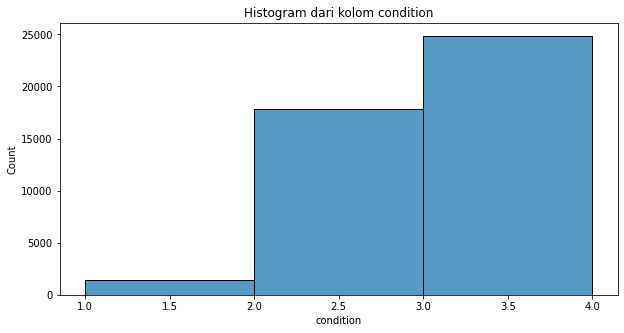

In [80]:
histogram(dataframe=data_final, column='condition', binwidth=1)

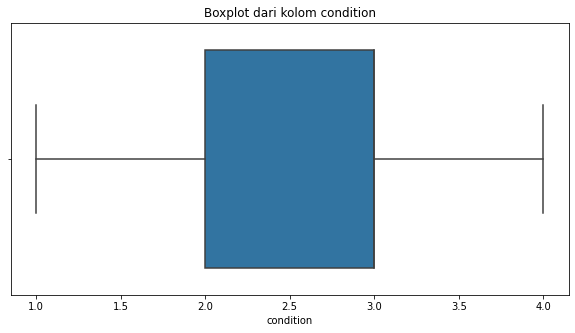

In [81]:
boxplot(dataframe=data_final, column='condition')

* findings :
    * Setelah Data dibersihkan dari outlier, Data kondisi Kendaraan tersebar dari range kondisi 1 - 4
    * Setelah Data dibersihkan dari outlier, Rata-rata kondisi kendaraan yang di jual berkondisi 3 - 4
    * Setelah Data dibersihkan dari outlier, 50% kondisi kendaraan dijual dibawah kondisi 4
* insight :
    * Orang sering menjual kendaraan dengan kondisi kendaraan sekitar 3 - 4
    * Kondisi Kendaraan yang dijual diwebsite sekitar 1 - 4
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan kondisi dibawah kondisi 4

### Parameter Inti Tanpa Outlier pada kolom cylinders

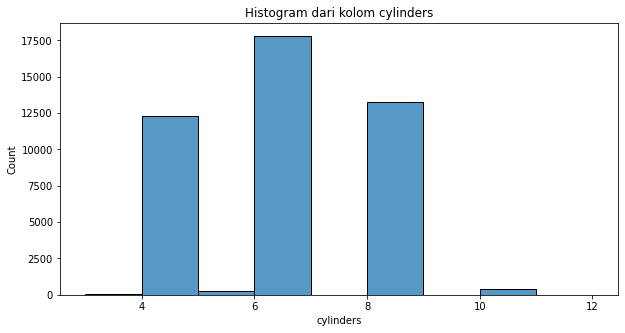

In [82]:
histogram(dataframe=data_final, column='cylinders', binwidth=1)

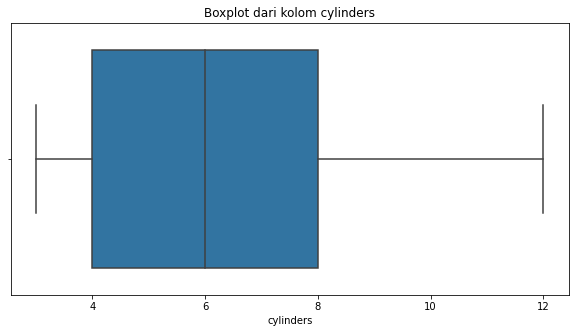

In [83]:
boxplot(dataframe=data_final, column='cylinders')

* findings :
    * Setelah Data dibersihkan dari cylinders, Data silinder Kendaraan tersebar dari range silinder 4 - 10
    * Setelah Data dibersihkan dari cylinders, Rata-rata silinder kendaraan yang di jual bersilinder 6 dan 8
    * Setelah Data dibersihkan dari cylinders, 50% silinder kendaraan dijual dibawah silinder 10
* insight :
    * Orang sering menjual kendaraan dengan silinder s 6 dan 8
    * Silinder Kendaraan yang dijual diwebsite sekitar 4 - 10
* recommendation :
    * Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan silinder dibawah silinder 10 dan diatas 4

## Masa Berlaku Iklan 

In [84]:
print('Minimum durasi listing', data['days_listed'].min())
print('Median durasi listing', data['days_listed'].median())
print('Mean durasi listing', data['days_listed'].mean())
print('Maximum durasi listing', data['days_listed'].max())

Minimum durasi listing 0
Median durasi listing 33.0
Mean durasi listing 39.55475982532751
Maximum durasi listing 271


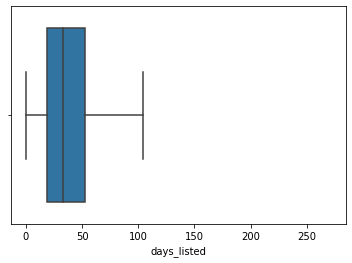

In [85]:
sns.boxplot(data=data, x='days_listed', fliersize=0)
plt.show()

**Kesimpulan Sementera**
* findings :
    * Pada umumnya, kendaraan dilisting (diiklankan) selama 33 - 40 hari
    * Terdapat kendaraan yang laku dihari dimana listing dimulai
    * Terdapat kendaraan yang belum laku hingga 271 hari atau sekitar 9 bulan
* recommendation : 
    * Kendaraan dikatakan sangat lama lakunya adalah ketika belum terjual sampai 100 hari karena batas atas dari outliernya adalah 100 hari
    * Iklan dihapus dengan cepat ketika kendaraan telah terjual
    * Iklan ditayangkan dalam waktu yang yang sangat lama ketika kendaraan belum terjual hingga batas atas outliernya yaitu 100 hari

## Harga Rata-Rata Setiap Jenis Kendaraan

Menganalisis jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Membuat sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Memilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.

In [86]:
type_stat = (pd.pivot_table(data_final, 
                            index='type',
                            aggfunc= {'days_listed':'count', 'price':'mean'})
            .sort_values('days_listed',ascending=False))
type_stat.columns = ['n_ads', 'price']
type_stat.reset_index(inplace=True)
type_stat

,type,n_ads,price
0,SUV,11058,9857.447730
1,sedan,10944,6664.391996
2,truck,9891,13975.521889
3,pickup,5621,13687.940936
4,coupe,1907,13232.501311
5,wagon,1456,8707.350275
6,mini-van,1055,7514.051185
7,hatchback,934,6586.259101
8,van,526,8087.933460
9,convertible,315,12907.158730


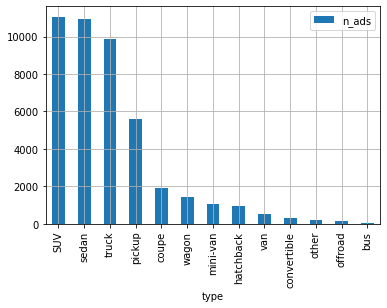

In [87]:
type_stat.plot(x='type', y='n_ads', kind='bar', grid=True)
plt.show()

* Data diatas menunjukkan sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Kendaraan dengan tipe SUV dan sedan adalah kendaraan dengan jumlah iklan paling banyak.

In [88]:
# Buat variabel untuk 2 kendaraan yang paling banyak iklannya
top2 = data_final.loc[data['type'].isin(['SUV', 'sedan']) & (data['price'] <= 34597.5)]

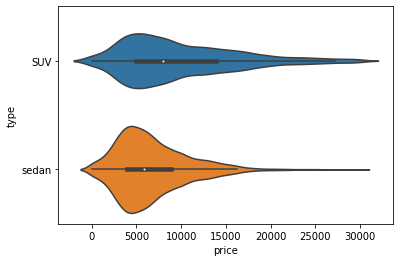

In [89]:
sns.violinplot(data=top2, x='price', y='type')
plt.show()

In [90]:
# Menghitung rata-rata harga untuk kendaraan tipe SUV dan truck
avg_suv = top2[top2['type'] == 'SUV']['price'].mean()
avg_sedan = top2[top2['type'] == 'sedan']['price'].mean()

# Menghitung median harga untuk kendaraan tipe SUV dan truck
median_suv = top2[top2['type'] == 'SUV']['price'].median()
median_sedan = top2[top2['type'] == 'sedan']['price'].median()

print("Rata-rata harga SUV:", avg_suv)
print("Rata-rata harga sedan:", avg_sedan)
print("Median harga SUV:", median_suv)
print("Median harga sedan:", median_sedan)

Rata-rata harga SUV: 9857.447730150117
Rata-rata harga sedan: 6664.391995614035
Median harga SUV: 8000.0
Median harga sedan: 5900.0


**Kesimpulan Sementara**
* Findings :
    1. Kendaraan Tipe SUV dan sedan kurang lebih memiliki harga dengan sebaran data yang sama yaitu antara 0 - 30000 ribu
    2. Kendaraan tipe SUV memiliki harga rata-rata sekitar 9857 dolar, dan memiliki median sebesar 8000 dolar 
    3. Kendaraan tipe sedan memiliki harga rata-rata sekitar 6664 dolar, dan memiliki median sebesar 5900 dolar

* Insight :
    1. Kendaraan tipe sedan memiliki quantil 1, median, quantil 3 truck lebih tinggi dari kendaraan dengan tipe suv
    2. Kendaraan tipe SUV memiliki data yang cenderung terpusat

## Faktor Harga

Mengambil masing-masing jenis kendaraan populer yang kamu temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. 

Membuat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu buat scatterplot untuk sisanya. Ketika menganalisis variabel kategorik, ingat bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

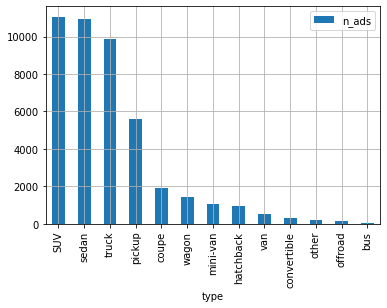

In [91]:
type_stat.plot(x='type', y='n_ads', kind='bar', grid=True)
plt.show()

In [92]:
top2.sort_values(by='type')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group,day_posted,mont_posted,year_posted,week_posted,vehicle_age,odo_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,0 - 10000,23,6,2018,5,8,18125.000000
21441,12995.0,2015,toyota rav4,3,6,gas,98000.0,automatic,SUV,red,True,2018-09-14,30,10000 - 20000,14,9,2018,4,4,24500.000000
21449,14995.0,2016,nissan rogue,3,4,gas,24432.0,automatic,SUV,silver,True,2019-01-07,25,10000 - 20000,7,1,2019,0,4,6108.000000
21450,2500.0,2002,jeep grand cherokee,2,6,gas,118614.0,automatic,SUV,grey,True,2018-10-06,49,0 - 10000,6,10,2018,5,17,6977.294118
21451,4000.0,2003,jeep liberty,3,6,gas,138000.0,automatic,SUV,silver,True,2019-04-18,32,0 - 10000,18,4,2019,3,17,8117.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22917,4900.0,2013,nissan altima,2,4,gas,137264.0,automatic,sedan,black,False,2018-09-10,23,0 - 10000,10,9,2018,0,6,22877.333333
22931,2799.0,2006,ford taurus,2,6,gas,133902.0,automatic,sedan,silver,False,2018-07-19,25,0 - 10000,19,7,2018,3,13,10300.153846
22955,6500.0,2013,honda civic,2,6,gas,88073.0,automatic,sedan,black,False,2018-06-26,34,0 - 10000,26,6,2018,1,6,14678.833333
22964,4000.0,2008,toyota corolla,3,4,gas,183300.0,automatic,sedan,red,False,2018-11-13,40,0 - 10000,13,11,2018,1,11,16663.636364


insight : 

* Tabel 1: Data Mobil SUV
    Tabel ini berisi informasi tentang kendaraan tipe SUV. Dari data ini, beberapa insight yang dapat diambil adalah:

    1. Harga Rata-rata: Harga rata-rata mobil SUV adalah sekitar 8.750 dolar. Ini menunjukkan bahwa mobil SUV pada tahun 2010 dengan kondisi baik cenderung memiliki harga yang relatif tinggi.

    2. Usia Kendaraan: Rata-rata usia kendaraan SUV adalah sekitar 9 tahun. Ini mungkin mengindikasikan bahwa pemilik mobil SUV cenderung menjaga kendaraan mereka dengan baik, atau bahwa mobil SUV memiliki umur pakai yang panjang.

    3. Pilihan Warna: Warna merah adalah yang paling umum pada mobil SUV yang dijual. Mungkin ini adalah preferensi konsumen yang signifikan atau bahkan warna standar yang lebih mudah dijual.

    4. Transmisi: Sebagian besar mobil SUV dalam tabel ini menggunakan transmisi otomatis, yang mungkin lebih populer di antara konsumen.

* Tabel 2: Data Mobil Sedan
    Tabel ini berisi informasi tentang kendaraan tipe sedan. Beberapa insight dari tabel ini adalah:

    1. Harga Rata-rata: Harga rata-rata mobil sedan adalah sekitar 6.900 dolar. Ini menunjukkan bahwa sedan yang lebih tua cenderung memiliki harga yang lebih rendah.

    2. Usia Kendaraan: Rata-rata usia kendaraan sedan adalah sekitar 10 tahun. Ini menunjukkan bahwa sebagian besar sedan dalam data ini adalah model yang lebih lama.

    3. Pilihan Warna: Warna perak/silver adalah yang paling umum pada mobil sedan yang dijual dalam data ini. Ini bisa mengindikasikan preferensi konsumen atau warna yang lebih mudah dijual.

    4. Transmisi: Sebagian besar mobil sedan dalam tabel ini juga menggunakan transmisi otomatis.

    5. Selain itu, kita dapat melihat bahwa ada kolom "fuel" yang mencantumkan jenis bahan bakar, "odo_year" yang menggambarkan tahun pembuatan odometer, dan "cylinders" yang menunjukkan jumlah silinder pada kendaraan. Informasi ini dapat digunakan untuk analisis lebih lanjut, seperti tren konsumen terkait dengan jenis bahan bakar atau pengaruh jumlah silinder terhadap harga.

    6. Penting untuk diingat bahwa analisis ini hanya berdasarkan data yang terbatas yang diberikan. Analisis yang lebih mendalam dan kompleks dapat dilakukan jika data lebih lengkap dan variabel lebih banyak tersedia.

In [93]:
# ambil 5 tipe kendaraan teratas berdasarkan harganya
top5 = data.loc[data['type'].isin(['SUV', 'truck', 'sedan', 'pickup', 'coupe']) & (data['price'] <= 34597.5)]
top5.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group,day_posted,mont_posted,year_posted,week_posted,vehicle_age,odo_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,0 - 10000,23,6,2018,5,8,18125.000000
1,25500.0,2015,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,20000 - 30000,19,10,2018,4,4,22176.250000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,0 - 10000,7,2,2019,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,137264.0,automatic,pickup,unknown,False,2019-03-22,9,0 - 10000,22,3,2019,4,17,8074.352941
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,10000 - 20000,2,4,2019,1,3,26967.666667


In [94]:
# ganti tipe data condition dan cylinders
top5[['condition', 'cylinders']] = top5[['condition', 'cylinders']].astype(str)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


* Mengganti tipe data pada kolom condition dan cylinders ke string agar dapat digunakan korelasi pada kolom kategorikal

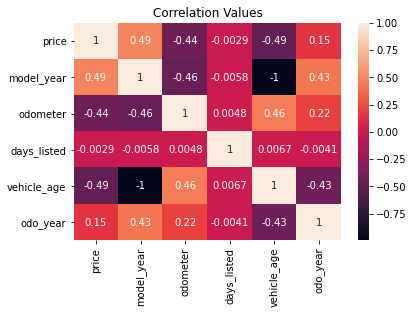

In [95]:
# correlation berguna untuk kolom numerikal x numerikal
num = top5[['price', 'model_year', 'odometer', 'days_listed', 'vehicle_age', 'odo_year']]

plt.title('Correlation Values')
sns.heatmap(num.corr(), annot=True)
plt.show()

**Korelasi**
* A. Korelasi Kolom price dengan kolom lain
    1. Korelasi antara price dengan model_year adalah 0.49 artinya semakin baru tahun model kendaraan maka semakin tinggi price atau harga kendaraan.
    2. Korelasi antara price dengan odometer adalah -0.41 artinya semakin banyak odometer kendaraan maka harganya semakin murah.
    3. Korelasi antara price dengan days_listed adalah -0.0029 artinya jumlah hari iklan ditayangkan tidak ada pengaruh terhadap harga kendaraan.
    4. Korelasi antara price dengan vehicle_age adalah -0.46 artinya semakin bertambah umur kendaraan maka harganya semakin murah.
    5. Korelasi antara price dengan odo_year adalah 0.24 atau memiliki korelasi yang lemah, atau bisa dikatakan semakin banyak jarak tempuh rata-rata kendaraan per tahun maka harganya semakin naik tidak terlalu tinggi.


* B. Korelasi Kolom model_year dengan kolom lain
    1. Korelasi antara model_year dengan odometer adalah -0.46 artinya semakin baru tahun model kendaraan maka semakin sedikit jarak tempuhnya.
    2. Korelasi antara model_year dengan days_listed adalah -0.0058 artinya semakin baru tahun model kendaraan maka semakin sedikit hari 
    3. Korelasi antara model_year dengan vehicle_age adalah -1 artinya model tahun kendaraan bertolak belakang dengan usia kendaraan, semakin baru tahun model kendaraan maka semakin tua usia kendaraan.
    4. Korelasi antara model_year dengan odo_year adalah 0.5 artinya semakin baru tahun model kendaraan maka semakin banyak jarak tempuh rata-rata kendaraan pertahun

* C. Korelasi Kolom odometer dengan kolom lain
    1. Korelasi antara odometer dengan days_listed adalah 0.0048 artinya jarak tempuh kendaraan tidak ada pengaruhnya dengan jumlah hari iklan ditayangkan 
    2. Korelasi antara odometer dengan vehicle_age adalah 0.46 artinya semakin banyak jarak tempuh kendaraan maka semakin tua usia kendaraan tersebut
    3. Korelasi antara odometer dengan odo_year adalah 0.13 artinya jarak tempuh kendaraan tidak ada pengaruhnya dengan jarak tempuh rata-rata kendaraan pertahun
    
* D. Korelasi Kolom days_listed dengan kolom lain
    1. Korelasi antara days_listed dengan vehicle_age adalah 0.0067 artinya jumlah hari iklan ditayangkan tidak ada pengaruhnya terhadap usia kendaraan
    2. Korelasi antara days_listed dengan odo_year adalah -0.0059 artinya jumlah hari iklan ditayangkan tidak ada pengaruhnya terhadap jarak tempuh rata-rata kendaraan pertahun
    
* E. Korelasi Kolom vehicle_age dengan kolom lain
    1. Korelasi antara vehicle_age dengan odo_year adalah -0.51 artinya usia kendaraan tidak ada pengaruhnya terhadap jarak tempuh rata-rata kendaraan pertahun

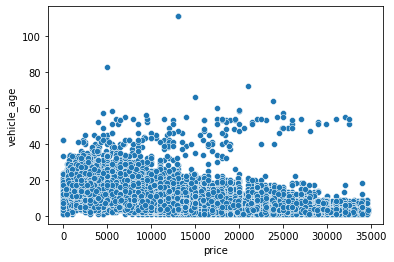

In [96]:
sns.scatterplot(data=num, x='price', y='vehicle_age')
plt.show()

* Berdasarkan visualisasi data diatas dapat disimpulkan bahwa Korelasi antara price dengan vehicle_age adalah korelasi yang lemah artinya semakin bertambah umur kendaraan maka harganya semakin murah.

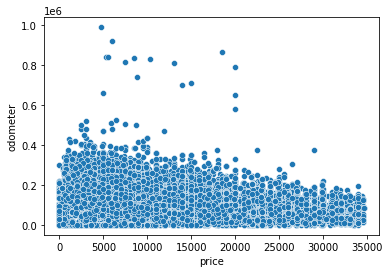

In [97]:
sns.scatterplot(data=num, x='price', y='odometer')
plt.show()

* Berdasarkan visualisasi data diatas dapat disimpulkan bahwa antara price dengan odometer memiliki korelasi menengah artinya semakin banyak odometer kendaraan maka harganya semakin murah.

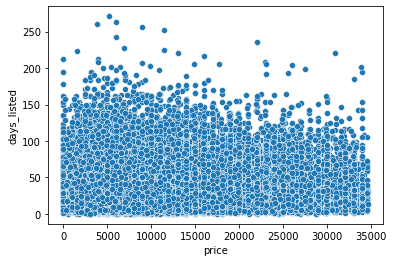

In [98]:
sns.scatterplot(data=num, x='price', y='days_listed')
plt.show()

* Berdasarkan visualisasi data diatas dapat disimpulkan bahwa antara price dengan days_listed memiliki korelasi yang sangat lemah artinya jumlah hari iklan ditayangkan tidak ada pengaruh terhadap harga kendaraan.

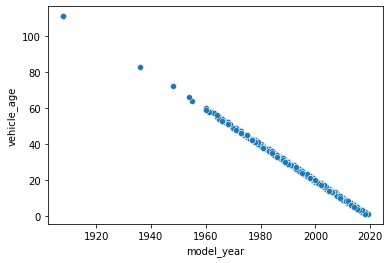

In [99]:
sns.scatterplot(data=num, x='model_year', y='vehicle_age')
plt.show()

* Berdasarkan visualisasi data diatas dapat disimpulkan bahwa antara model_year dengan vehicle_age memiliki korelasi yang sangat kuat akan tetapi berbanding terbalik artinya semakin baru tahun model kendaraan maka semakin tua usia kendaraan.

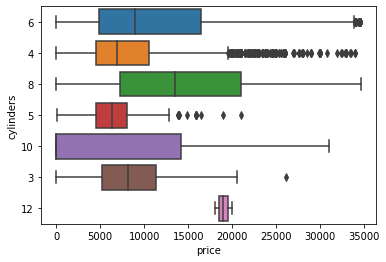

In [100]:
sns.boxplot(data=top5, x='price', y='cylinders')
plt.show()

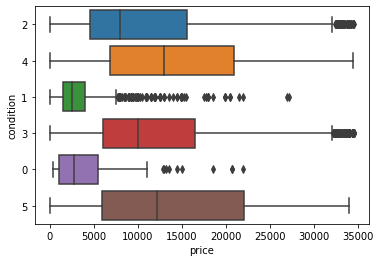

In [101]:
sns.boxplot(data=top5, x='price', y='condition')
plt.show()

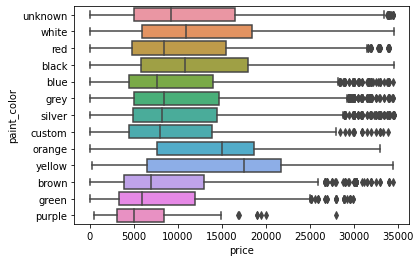

In [102]:
sns.boxplot(data=top5, x='price', y='paint_color')
plt.show()

# Kesimpulan Umum

* A. Pra-Pemrosesan Data

    1. Dataframe awal atau data mentah memiliki 51525 baris dan 12 kolom, seluruh nama kolom telah ditulis dengan baik dengan huruf kecil, tipe data setiap kolom telah diisi dengan benar, meskipun terdapat beberapa kolom yang memiliki missing value dan tipe data yang salah.
    2. Tedapat 5 kolom yang memiliki nilai yang hilang yaitu kolom model_year, cylinders, odometer, paint_color, dan is4wd. Kolom yang memuat paling banyak nilai yang hilang adalah kolom is4wd yang memiliki 50% nilai yang hilang, kolom paint_color memiliki 18% nilai yang hilang, kolom odometer memiliki 15% nilai yang hilang, kolom cylinders memiliki 10% nilai yang hilang, dan kolom model_year meiliki 7% nilai yang hilang
    3. Terdapat Tipe Data yang tidak sesuai, yaitu pada kolom price, model_year, cylinders, odometer, is4_wd, days_listed, dan date_posted.

* B. Exploratory Data Analysis (EDA)

    1. HANDLING MISSING VALUES
        a. Menangani nilai yang hilang pada kelima kolom tersebut dengan beberapa cara, dapat menggunakan mean atau median untuk mengisi nilai yang hilang.
        b. Untuk mengisi nilai yang hilang pada kolom model_year yaitu menggunakan median karena median lebih baik untuk distribusi tahun model yang tidak merata dan menggunakan median akan membantu mengurangi pengaruh nilai ekstrem atau outliers dan memberikan representasi yang lebih akurat tentang model tahun pada jenis kendaraan tertentu.
        c. Untuk mengisi nilai yang hilang pada kolom cylinders yaitu menggunakan median karena nilai median dan mean terdapat perbedaan yang signifikan, itu bisa jadi menandakan adanya indikasi outliers dalam data, sehingga menggunakan median lebih baik untuk distribusi cylinders yang tidak merata dan karena median lebih tahan terhadap outliers.
        d. Untuk mengisi nilai yang hilang pada kolom odometer yaitu menggunakan median karena nilai median dan mean terdapat perbedaan yang signifikan, itu bisa jadi menandakan adanya indikasi outliers dalam data, sehingga menggunakan median lebih baik untuk distribusi odometer yang tidak merata dan karena median lebih tahan terhadap outliers.
        e. Untuk mengisi nilai yang hilang pada kolom paint_color yaitu dengan cara mengisi secara langsung nilai tersebut dengan method .fillna()
        f. Untuk mengisi nilai yang hilang pada kolom is_4wd yaitu dengan cara mengisi secara langsung nilai tersebut dengan method .fillna()
        
    2. Memperbaiki Tipe Data
        a. Memperbaiki tipe data pada Kolom price dan odometer dirubah menjadi float
        a. Memperbaiki tipe data pada Kolom model_year, cylinders dan days_listed dirubah menjadi int
        c. Memperbaiki tipe data pada Kolom is_4wd dirubah menjadi bool
        d. Memperbaiki tipe data pada Kolom date_posted yang bernilai object dirubah menjadi datetime
        
    3. Memperbaiki Kualitas Data
    
        a. Memperbaiki tipe data pada Kolom condition dirubah menjadi nilai string dengan skala numerik:
             
            -salvage = 0
            -fair = 1
            -good = 2
            -excellent = 3
            -like new = 4
            -new = 5
        b. Menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan yaitu dengan cara menambahkan kolom day_poster, month_posted, year_posted, dan week_posted
        c. Menambahkan usia kendaraan saat iklan ditayangkan yaitu dengan cara menambahkan kolom vehicle_age
        d. Menambahkan jarak tempuh rata-rata kendaraan per tahun yaitu dengan cara menambahkan kolom odo_year
        
        
    4. Mempelajari Parameter Inti
         Memilih pendekatan yang tepat untuk mempelajari kolom di bawah ini, memperhatikan bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram.
         
        a. Pendekatan yang tepat pada kolom price adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
            findings :
                -Data penjualan Harga Kendaraan tersebar dengan Range 0 - 50 ribu
                -Terdapat data outlier hingga lebih dari 3500
                -Rata-rata Harga Kendaraan di harga 12 ribu
                -50% Kendaraan yang dijual dibawah 9 ribu
            insight :
                -Jarang orang menjual kendaraan dengan harga yang mahal
                -Kendaraan yang dijual di website kebanyakan di harga 12 ribu
            recommendation :
                -Jika ingin menjual Kendaraan dengan cepat, bisa dijual dengan harga dibawah 12 ribu
         
        b. Pendekatan yang tepat pada kolom cylinders adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
            findings :
                -Data Usia Kendaraan ketika iklan ditayangkan tersebar dari range 0-50 tahun
                -Tidak outlier dalam data
                -Rata-rata usia kendaraan ketika iklan ditayangkan adalah sekitar 8 tahun
                -50% usia kendaraan ketika iklan ditayangkan dijual dibawah 8 tahun
            insight :
                -Jarang orang menjual kendaraan dengan usia kendaraan yang lebih dari 20 tahun
                -Usia Kendaraan yang dijual diwebsite kebanyakan dijual di usia sekitar 8 tahun
            recommendation :
                -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan usia dibawah 8 tahun.
        
         
        c. Pendekatan yang tepat pada kolom odo_year adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
             findings :
                -Data jarak tempuh rata-rata kendaraan per tahun tersebar dari range 0-140 ribu kilometer
                -Terdapat Outlier dalam data hingga 1750 kendaraan
                -Rata-rata Jarak Tempuh kendaraan adalah sekitar 15 ribu kilometer
                -50% jarak tempuh rata-rata kendaraan per tahun dijual dibawah 13 ribu kilometer
             insight :
                -Jarang orang menjual kendaraan dengan jarak tempuh yang lebih dari 50 ribu kilometer
                -Jarak tempuh rata-rata Kendaraan per tahun yang dijual diwebsite sekitar 15 ribu kilometer
             recommendation :
                -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan jarak tempuh dibawah 13 ribu kilometer.

                
        d. Pendekatan yang tepat pada kolom cylinders adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
            findings :
                -Kendaraan yang dijual di website adalah kendaraan yang bersilinder 3,4,5,6,8, dan 10
                -Kendaraan yang paling banyak dijual di website adalah kendaraan yang bersilinder 4,6, dan 8
                -Sangat jarang kendaraan bekas yang dijual dengan silinder 3,5 dan 10
             insight :
                -Kendaraan dengan silindir 3,5, dan 10 adalah kendaraan langka. Bisa jadi kendaraan dengan silinder tersebut sulit dijual atau termasuk kendaraan langka
             recommendation :
                -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan silinder 6
        
        e. Pendekatan yang tepat pada kolom condition adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
            findings :
                -Kendaraan yang paling banyak dijual di website adalah kendaraan yang kondisinya excellent
                -Sangat jarang kendaraan yang dijual di website dengan kondisi salvage atau rongsok
                -Kendaraan dengan kondisi new atau baru juga jarang dijual di website
             insight :
                -Kendaraan dengan kondisi salvage bisa jadi kendaraan tersebut sudah rusak parah atau sudah rongsokan
                -Kendaraan dengan kondisi new jarang di jual diwebsite bisa jadi si penjual menjadi reseller atau tidak suka dengan kendaraan barunya
             recommendation :
                -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan kondisi yang excellent
        

    5. Mempelajari dan Menangani Outlier
    
        a. Mempelajari dan Menangani Outlier pada kolom price
            findings :
            Berdasarkan hasil diatas, dapat disimpulkan :
            1. Batas bawah outlier pada kolom price adalah -12700.0, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
            2. Batas atas outlier pada kolom price adalah 34500.0
            3. Pada awalnya kolom price Terdapat Outliers yang besar hingga lebih dari 350000 ribu
            4. Perlu dilakukan 5 kali proses pembersihan outlier
            5. Cleaning Outlier pertama, batas bawahnya berubah menjadi -11362.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 32257.5
            6. Cleaning Outlier kedua, batas bawahnya berubah menjadi -10762.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 31257.5
            7. Cleaning Outlierketiga, batas bawahnya berubah menjadi -10012.5 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30007.5    
            8. Cleaning Outlier keempat, batas bawahnya berubah menjadi -10011.0 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30005.0
            9. Cleaning Outlier kelima, batas bawahnya berubah menjadi -10011.0 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 30005.0
            10. Outlier berhasil dibersihkan setelah dilakukan 5 kali cleaning outlier, sehingga tidak terdapat outlier lagi.
        
        
        b. Mempelajari dan Menangani Outlier pada kolom vehicle_age
            findings :
            Berdasarkan hasil diatas, dapat disimpulkan :
                1. Batas bawah outlier pada kolom vehicle_age adalah -4.5, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
                2. Batas atas outlier pada kolom vehicle_age adalah 23.5 
                3. Pada awalnya kolom vehicle_age Terdapat Outliers yang besar hingga lebih dari 100 tahun
                4. Outlier berhasil dibersihkan hanya dengan 1 kali cleaning outlier, sehingga tidak terdapat outlier lagi

        
        c. Mempelajari dan Menangani Outlier pada kolom odo_year
            findings :
            Berdasarkan hasil diatas, dapat disimpulkan :
                1. Batas bawah outlier pada kolom odo_year adalah -1596.67, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
                2. Batas atas outlier pada kolom odo_year adalah 27905.57
                3. Pada awalnya kolom odo_year Terdapat Outliers yang besar hingga lebih dari 350000 ribu
                4. Perlu dilakukan 8 kali proses pembersihan outlier
                5. Cleaning Outlier pertama, batas bawahnya berubah menjadi -1411.77 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27450.99  
                6. Cleaning Outlier kedua, batas bawahnya berubah menjadi -1315.61 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27218.32    
                7. Cleaning Outlier ketiga, batas bawahnya berubah menjadi -1311.87 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27186.45   
                8. Cleaning Outlier keempat, batas bawahnya berubah menjadi -1297.7 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27162.89    
                9. Cleaning Outlier kelima, batas bawahnya berubah menjadi -1292.21 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27153.68    
                10. Cleaning Outlier keenam, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875   
                11. Cleaning Outlier ketujuh, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875 
                12. Cleaning Outlier kedelapan, batas bawahnya berubah menjadi -1291.125 akan tetapi tetap kita anggap bahwa batas bawahnya adalah 0 dan batas atasnya berubah menjadi 27151.875    
                13. Outlier berhasil dibersihkan setelah dilakukan 8 kali cleaning outlier, sehingga tidak terdapat outlier lagi. 

        d. Mempelajari dan Menangani Outlier pada kolom condition
            findings :
            Berdasarkan hasil diatas, dapat disimpulkan :
                1. Batas bawah outlier pada kolom vehicle_age adalah 0.5, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
                2. Batas atas outlier pada kolom vehicle_age adalah 4.5 
                3. Pada awalnya kolom vehicle_age Terdapat Outliers yang bernilai 0 dan 5
                4. Outlier berhasil dibersihkan hanya dengan 1 kali cleaning outlier, sehingga tidak terdapat outlier lagi

        
        e. Mempelajari dan Menangani Outlier pada kolom cylinders
            findings :
            Berdasarkan hasil diatas, dapat disimpulkan :
                1. Batas bawah outlier pada kolom cylinders adalah -2.0, akan tetapi tidak masuk akal jika orang menjual kendaraan malah bernilai negatif, untuk itu bisa kita anggap bahwa batas bawah outlier untuk kolom price adalah 0 seperti pada boxplot diatas
                2. Batas atas outlier pada kolom cylinders adalah 14.0
                3. Pada awalnya kolom cylinders memang tidak terdapat Outliers
                4. Sehingga tidak perlu adanya cleaning outlier
        
    6. Mempelajari Parameter Inti Tanpa Outlier
       
       a. Parameter Inti Tanpa Outlier pada kolom price
       
          Pendekatan yang tepat pada kolom price adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
          
        findings :
            -Setelah dibersihkan dari outlier, Data penjualan Harga Kendaraan tersebar dengan Range 0 - 30000 ribu dolar
            -Setelah dibersihkan dari outlier, Rata-rata Harga Kendaraan di harga 10478 dolar
            -setelah dibersihkan dari outlier, 50% Kendaraan yang dijual dibawah 8500 dolar
        insight :
            -Customer cenderung memilih untuk membeli kendaraan yang harganya dibawah 8500 dolar
            -Kendaraan yang dijual di website kebanyakan di harga 10500 dolar
        recommendation :
            -Jika ingin menjual Kendaraan dengan cepat, bisa dijual dengan harga dibawah 8500 dolar


       b. Parameter Inti Tanpa Outlier pada kolom vehicle_age
           
          Pendekatan yang tepat pada kolom vehicle_age adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
          
        findings :
            -Setelah data dibersihkan dari outlier, Data Usia Kendaraan ketika iklan ditayangkan tersebar dari range 0-22 tahun
            -Setelah data dibersihkan dari outlier, Rata-rata usia kendaraan ketika iklan ditayangkan adalah sekitar 9.8 tahun
            -Setelah data dibersihkan dari outlier, 50% usia kendaraan ketika iklan ditayangkan dijual dibawah 9 tahun
        insight :
            -Jarang orang menjual kendaraan dengan usia kendaraan yang lebih dari 20 tahun
            -Usia Kendaraan yang dijual diwebsite kebanyakan dijual di usia sekitar 9 tahun
        recommendation :
            -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan usia dibawah 9 tahun.
                
       c. Parameter Inti Tanpa Outlier pada kolom odo_year

          Pendekatan yang tepat pada kolom odo_year adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
          
        findings :
            -Setelah Data dibersihkan dari outlier, Data Jarak Tempuh Kendaraan tersebar dari range 0 - 27000 ribu kilometer
            -Setelah Data dibersihkan dari outlier, Rata-rata Jarak Tempuh kendaraan adalah sekitar 13092 kilometer
            -Setelah Data dibersihkan dari outlier, 50% jarak tempuh kendaraan dijual dibawah 12550 kilometer
        insight :
            -Orang sering menjual kendaraan dengan jarak tempuh sekitar 10 - 15 ribu kilometer
            -Jarak tempuh Kendaraan yang dijual diwebsite sekitar 13 ribu kilometer
        recommendation :
            -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan jarak tempuh dibawah 12500 kilometer.
          
       d. Parameter Inti Tanpa Outlier pada kolom condition
       
          Pendekatan yang tepat pada kolom condition adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
       
        findings :
            -Setelah Data dibersihkan dari outlier, Data kondisi Kendaraan tersebar dari range kondisi 1 - 4
            -Setelah Data dibersihkan dari outlier, Rata-rata kondisi kendaraan yang di jual berkondisi 3 - 4
            -Setelah Data dibersihkan dari outlier, 50% kondisi kendaraan dijual dibawah kondisi 4
        insight :
            -Orang sering menjual kendaraan dengan kondisi kendaraan sekitar 3 - 4
            -Kondisi Kendaraan yang dijual diwebsite sekitar 1 - 4
        recommendation :
            -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan kondisi dibawah kondisi 4
        
       
       e. Parameter Inti Tanpa Outlier pada kolom cylinders
           
          Pendekatan yang tepat pada kolom cylinders adalah menggunakan visualisasi data berupa histogram dan boxplot. Berdasarkan data histogram dan boxplot tersebut, dapat disimpulkan:
          
        findings :
            -Setelah Data dibersihkan dari cylinders, Data silinder Kendaraan tersebar dari range silinder 4 - 10
            -Setelah Data dibersihkan dari cylinders, Rata-rata silinder kendaraan yang di jual bersilinder 6 dan 8
            -Setelah Data dibersihkan dari cylinders, 50% silinder kendaraan dijual dibawah silinder 10
        insight :
            -Orang sering menjual kendaraan dengan silinder s 6 dan 8
            -Silinder Kendaraan yang dijual diwebsite sekitar 4 - 10
        recommendation :
            -Jika ingin menjual kendaraan dengan cepat, bisa jual kendaraan dengan silinder dibawah silinder 10 dan diatas 4
                  
    7. Masa Berlaku Iklan
        
        a. Minimum durasi listing atau hari iklan ditayangkan adalah 0 hari
        b. Median durasi listing atau hari iklan ditayangkan adalah 33.0 hari
        c. Mean durasi listing atau hari iklan ditayangkan adalah 39.55475982532751 hari
        d. Maximum durasi listing atau hari iklan ditayangkan adalah 271 hari

        Berdasarkan data diatas dapat disimpulkan:
        
          findings :
              -Pada umumnya, kendaraan dilisting (diiklankan) selama 33 - 40 hari
              -Terdapat kendaraan yang laku dihari dimana listing dimulai
              -Terdapat kendaraan yang belum laku hingga 271 hari atau sekitar 9 bulan
          recommendation :
              -Kendaraan dikatakan sangat lama lakunya adalah ketika belum terjual sampai 100 hari karena batas atas dari outliernya adalah 100 hari
              -Iklan dihapus dengan cepat ketika kendaraan telah terjual
              -Iklan ditayangkan dalam waktu yang yang sangat lama ketika kendaraan belum terjual hingga batas atas outliernya yaitu 100 hari

    8. Harga Rata-Rata Setiap Jenis Kendaraan
    
        a. Menganalisis jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Membuat sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Memilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.
        b. Berdasarkan data diatas, 2 Jenis Kendaraan dengan jumlah iklan paling banyak adalah jenis SUV dan sedan
        c. Berdasarkan data dapat disimpulkan:
        
          Findings :
            -Kendaraan Tipe SUV dan sedan kurang lebih memiliki harga dengan sebaran data yang sama yaitu antara 0 - 30000 ribu
            -Kendaraan tipe SUV memiliki harga rata-rata sekitar 9857 dolar, dan memiliki median sebesar 8000 dolar
            -Kendaraan tipe sedan memiliki harga rata-rata sekitar 6664 dolar, dan memiliki median sebesar 5900 dolar
          Insight :
            -Kendaraan tipe sedan memiliki quantil 1, median, quantil 3 truck lebih tinggi dari kendaraan dengan tipe suv
            -Kendaraan tipe SUV memiliki data yang cenderung terpusat


    9. Faktor Harga
        a. Mengambil masing-masing jenis kendaraan populer yang kamu temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya.
        b. Membuat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu buat scatterplot untuk sisanya. Ketika menganalisis variabel kategorik, ingat bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.
        c. Mengganti tipe data pada kolom condition dan cylinders ke string agar dapat digunakan korelasi pada kolom kategorikal agar dapat divisuaisasikan.


    10. Korelasi antar kolom
    
        a. Korelasi Kolom price dengan kolom lain
            -Korelasi antara price dengan model_year adalah 0.49 artinya semakin baru tahun model kendaraan maka semakin tinggi price atau harga kendaraan.
            -Korelasi antara price dengan odometer adalah -0.41 artinya semakin banyak odometer kendaraan maka harganya semakin murah.
            -Korelasi antara price dengan days_listed adalah -0.0029 artinya jumlah hari iklan ditayangkan tidak ada pengaruh terhadap harga kendaraan.
            -Korelasi antara price dengan vehicle_age adalah -0.46 artinya semakin bertambah umur kendaraan maka harganya semakin murah.
            -Korelasi antara price dengan odo_year adalah 0.24 atau memiliki korelasi yang lemah, atau bisa dikatakan semakin banyak jarak tempuh rata-rata kendaraan per tahun maka harganya semakin naik tidak terlalu tinggi.
            
        b. Korelasi Kolom model_year dengan kolom lain

           -Korelasi antara model_year dengan odometer adalah -0.46 artinya semakin baru tahun model kendaraan maka semakin sedikit jarak tempuhnya.
            -Korelasi antara model_year dengan days_listed adalah -0.0058 artinya semakin baru tahun model kendaraan maka semakin sedikit hari
            -Korelasi antara model_year dengan vehicle_age adalah -1 artinya model tahun kendaraan bertolak belakang dengan usia kendaraan, semakin baru tahun model kendaraan maka semakin tua usia kendaraan.
            -Korelasi antara model_year dengan odo_year adalah 0.5 artinya semakin baru tahun model kendaraan maka semakin banyak jarak tempuh rata-rata kendaraan pertahun
            
        c. Korelasi Kolom odometer dengan kolom lain

           -Korelasi antara odometer dengan days_listed adalah 0.0048 artinya jarak tempuh kendaraan tidak ada pengaruhnya dengan jumlah hari iklan ditayangkan
            -Korelasi antara odometer dengan vehicle_age adalah 0.46 artinya semakin banyak jarak tempuh kendaraan maka semakin tua usia kendaraan tersebut
            -Korelasi antara odometer dengan odo_year adalah 0.13 artinya jarak tempuh kendaraan tidak ada pengaruhnya dengan jarak tempuh rata-rata kendaraan pertahun
            
        d. Korelasi Kolom days_listed dengan kolom lain

          -Korelasi antara days_listed dengan vehicle_age adalah 0.0067 artinya jumlah hari iklan ditayangkan tidak ada pengaruhnya terhadap usia kendaraan
            -Korelasi antara days_listed dengan odo_year adalah -0.0059 artinya jumlah hari iklan ditayangkan tidak ada pengaruhnya terhadap jarak tempuh rata-rata kendaraan pertahun
E. Korelasi Kolom vehicle_age dengan kolom lain

Korelasi antara vehicle_age dengan odo_year adalah -0.51 artinya usia kendaraan tidak ada pengaruhnya terhadap jarak tempuh rata-rata kendaraan pertahun